# implementing Ridge regression

In [1]:
# importing all required liabraries
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

# now define the path of dataset
global _path
_path = os.path.dirname(os.getcwd()) + '/No Null/no-null-horse-details.csv'
_path

'/Users/pan/Desktop/proj/MLHD/No Null/no-null-horse-details.csv'

In [2]:
# now read our dataset
hd = pd.read_csv(_path)
hd

,Unnamed: 0,Serial no.,Horse id,Horse-Gender,Horse-Height,Horse-Weight,Racer-Horse
0,3,4,H4,M,51.0,409.0,Yes
1,8,9,H9,F,46.0,389.0,Yes
2,9,10,H10,M,63.0,731.0,No
3,22,23,H23,M,72.0,1181.0,No
4,26,27,H27,F,60.0,607.0,No
...,...,...,...,...,...,...,...
42858,99985,99986,H99986,F,47.0,386.0,No
42859,99986,99987,H99987,F,52.0,444.0,No
42860,99988,99989,H99989,F,60.0,664.0,Yes
42861,99994,99995,H99995,F,64.0,811.0,No


In [3]:
# now extract independent and dependent datset
X = hd.iloc[:, 4:5].values
print(X)
y = hd.iloc[:, 5:6].values
y

[[51.]
 [46.]
 [63.]
 ...
 [60.]
 [64.]
 [63.]]


array([[409.],
       [389.],
       [731.],
       ...,
       [664.],
       [811.],
       [785.]])

<AxesSubplot:xlabel='Horse-Height', ylabel='Horse-Weight'>

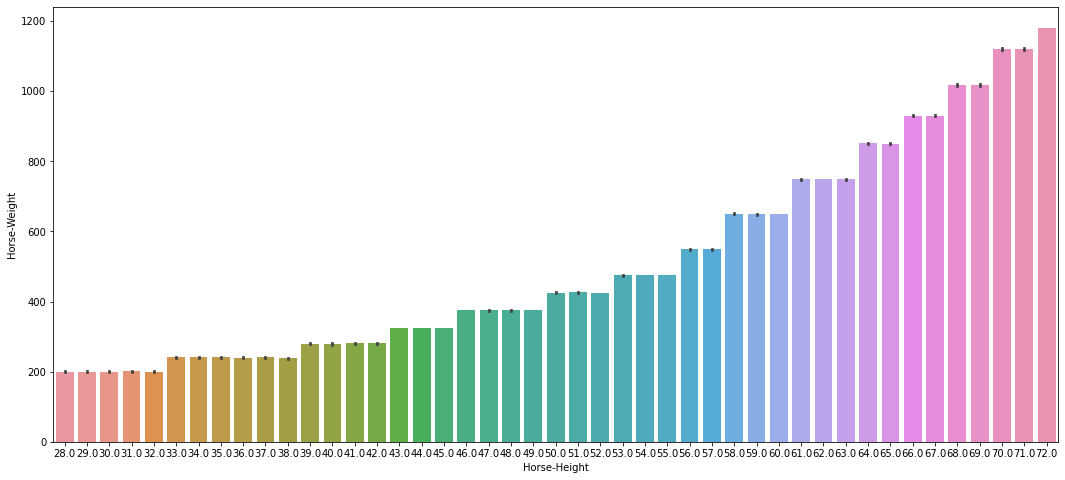

In [4]:
# now plot our dataset with horse height and weight
plt.subplots(figsize=(18, 8))
sns.barplot(x='Horse-Height', y='Horse-Weight', data=hd)

In [5]:
# splitting our dataset into testing and training set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=1)
X_train

array([[48.],
       [56.],
       [48.],
       ...,
       [64.],
       [56.],
       [58.]])

In [6]:
# now create our ridge model
from sklearn.linear_model import Ridge

# now initiate our model
ridge = Ridge()
ridge

# building model
ridge.fit(X_train, y_train)

Ridge()

Text(0, 0.5, 'Weight')

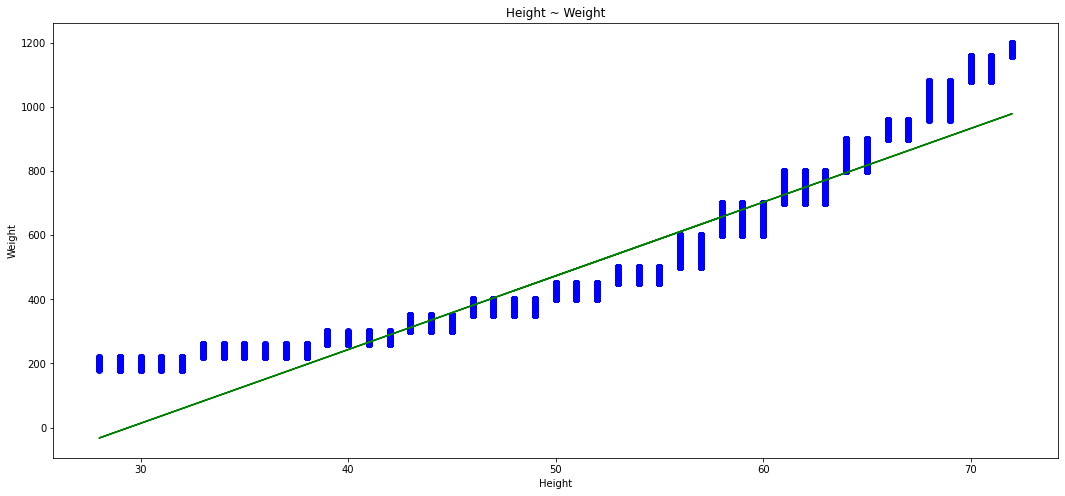

In [7]:
# now plot our training dataset model
plt.subplots(figsize=(18, 8))
plt.scatter(X_train, y_train, color='blue')
plt.plot(X_train, ridge.predict(X_train), color='green')
plt.title('Height ~ Weight')
plt.xlabel('Height')
plt.ylabel('Weight')

In [8]:
# now predict the value dependent variable
y_pred = ridge.predict(X_test)
y_pred

array([[679.74276754],
       [794.66096603],
       [702.72640724],
       ...,
       [679.74276754],
       [151.1190545 ],
       [197.08633389]])

Text(0, 0.5, 'Weight')

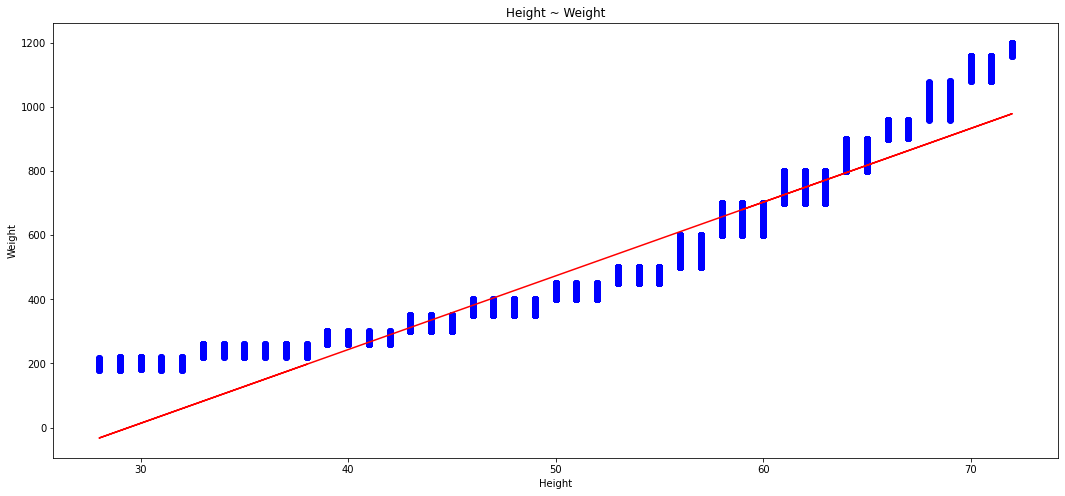

In [9]:
# now plot our test dataset
plt.subplots(figsize=(18, 8))
plt.scatter(X_test, y_test, color='blue')
plt.plot(X_test, ridge.predict(X_test), color='red')
plt.title('Height ~ Weight')
plt.xlabel('Height')
plt.ylabel('Weight')

In [10]:
# now calculating residuals
from sklearn import metrics

print('MAE: ', metrics.mean_absolute_error(y_pred, y_test))
print('MSE: ', metrics.mean_squared_error(y_pred, y_test))
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_pred, y_test)))

MAE:  60.709698913832376
MSE:  6094.94053106686
RMSE:  78.07010010924067


In [11]:
# now calculating accuracy
accuracy = ridge.score(X_test, y_test) * 100
print('Accuracy: ', round(accuracy, 5), end='%') 

Accuracy:  88.71899%

In [12]:
''' here we can say that 
ridge regression having more errors as compare
to linear regression but perform better than lasso regress
'''

' here we can say that \nridge regression having more errors as compare\nto linear regression.\n'